In [374]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches


In [375]:

def initgrid(L = 10, allup=False, ifplot=True):

    M=np.zeros([L,L])
    for i in range(len(M)):
        for j in range(len(M)):
            ran=np.random.random()
            if(ran<0.5):
                M[i,j] = 1
            else:
                if allup==False:
                    M[i,j] = -1
                else:
                    M[i,j] = 1
    if ifplot == True:
        plt.figure(figsize=(6,6))
        values = np.unique(M.ravel())
    
        im = plt.imshow(M, interpolation='none')
        colors = [ im.cmap(im.norm(value)) for value in values]
        patches = [ mpatches.Patch(color=colors[i], label="Spin {l}".format(l=values[i]) ) for i in range(len(values)) ]
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
        plt.title('Randomozed sipns on grid')
        plt.grid(True)
        plt.xticks(ticks=np.linspace(0,9,10))
        plt.yticks(ticks=np.linspace(0,9,10))

        plt.show()
    return M, L

In [376]:
def calcMagnetization(M):
    spin = 0
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i,j]>0:
                spin = spin+1
            else:
                spin = spin-1
    return spin/len(M)**2

In [377]:
def earlystopping(array, delta, index):
    data=np.array(array[index-100:])
    ave1=np.average(data)
    data2=np.array(array[index-20:])
    ave2=np.average(data2)
    if abs((ave2-ave1))<ave1/50:
        return True
    else:
        return False
    

In [378]:
def isingmodel (
    n = 100,
    h = 1,
    K = 1, 
    kbT = 5
):
    M, L = initgrid(10,True, False)
    Energy = 0
    for i in range(L):
        for j in range (L):
            Sn = M[(i - 1) % L, j] + M[(i + 1) % L, j] + M[i, (j - 1) % L] + M[i, (j + 1) % L]   
            Energy += M[i,j]*(h+K*Sn)
    magnetization = []
    energyHistory = []
    max=0
    prng = np.random.RandomState(12347890)
    for tstep in range(n):
        i=prng.randint(0,9)
        j=prng.randint(0,9)
        Sn = M[(i - 1) % L, j] + M[(i + 1) % L, j] + M[i, (j - 1) % L] + M[i, (j + 1) % L]
        dE=-2 * M[i,j] * (h + K * Sn)
        if dE<0 or prng.random()<np.exp(-dE/kbT):
            M[i,j] = -M[i,j]
            Energy+=dE
        energyHistory.append(Energy)
        magnetization.append(calcMagnetization(M))
        if tstep>100:
            if earlystopping(magnetization,0.1,tstep) == True:
                max=tstep
                break
    
    if max == 0:
        max=n
    return energyHistory,M,max, magnetization, np.average(np.array(magnetization[max-100:]))
        

Process:0/100 (es:0)
Process:1/100 (es:1)
Process:2/100 (es:1)
Process:3/100 (es:2)
Process:4/100 (es:2)
Process:5/100 (es:2)
Process:6/100 (es:2)
Process:7/100 (es:2)
Process:8/100 (es:2)
Process:9/100 (es:2)
Process:10/100 (es:2)
Process:11/100 (es:3)
Process:12/100 (es:3)
Process:13/100 (es:3)
Process:14/100 (es:3)
Process:15/100 (es:3)
Process:16/100 (es:3)
Process:17/100 (es:3)
Process:18/100 (es:3)
Process:19/100 (es:3)
Process:20/100 (es:3)
Process:21/100 (es:3)
Process:22/100 (es:4)
Process:23/100 (es:4)
Process:24/100 (es:4)
Process:25/100 (es:4)
Process:26/100 (es:4)
Process:27/100 (es:4)
Process:28/100 (es:4)
Process:29/100 (es:4)
Process:30/100 (es:4)
Process:31/100 (es:4)
Process:32/100 (es:4)
Process:33/100 (es:4)
Process:34/100 (es:4)
Process:35/100 (es:4)
Process:36/100 (es:4)
Process:37/100 (es:5)
Process:38/100 (es:5)
Process:39/100 (es:5)
Process:40/100 (es:5)
Process:41/100 (es:6)
Process:42/100 (es:7)
Process:43/100 (es:8)
Process:44/100 (es:9)
Process:45/100 (es:9

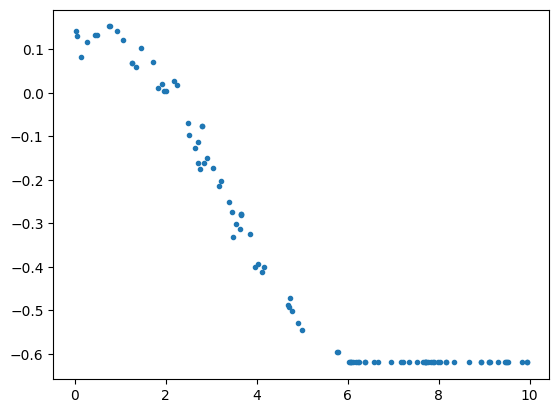

In [379]:
ave= []
H=[]
es=0
for i in range(100):
    h=np.random.random()*10
    Data,M,n, magnetization,average=isingmodel(5000,h,1,1)
    if n<5000:
        es+=1
    print(f"Process:{i}/{100} (es:{es})")
    ave.append(average)
    H.append(h)
plt.plot(H,ave,'.')


In [380]:
len(M)


10

ValueError: x and y must have same first dimension, but have shapes (5001,) and (5000,)

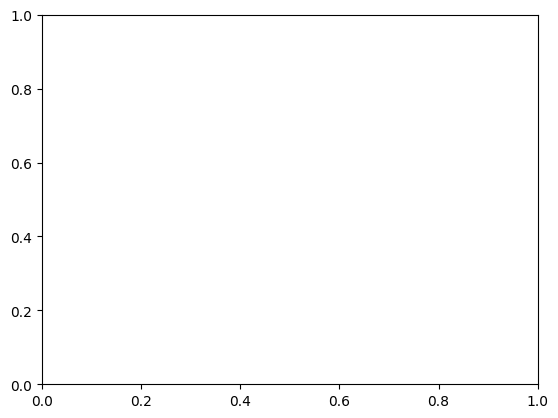

In [381]:
plt.plot(np.linspace(1,n+1,n+1), magnetization)